<a href="https://colab.research.google.com/github/m-arifin-ilham/bike-ridership-analysis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Arifin Ilham
- **Email:** arifinsmp5@gmail.com
- **ID Dicoding:** arifin_ilham_r315

## Menentukan Pertanyaan Bisnis


- Bagaimana trend total penggunaan sepeda dari bulan ke bulan?
- Bagaimana trend total penggunaan sepeda per kuartal?

- Hari apa yang memiliki rata-rata penggunaan sepeda tertinggi?
- Di antara rentang jam 00:00-08:00, 08:00-16:00 dan 16:00-24:00, rentang jam apa yang memiliki rata-rata penggunaan sepeda tertinggi?

## Import Semua Packages/Library yang Digunakan

Pada tahap ini, dilakukan import semua packages/library yang digunakan. Mulai dari numpy, pandas, hingga streamlit.

In [ ]:
# installing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Selanjutnya pada tahap ini, dilakukan pengumpulan data yang berupa dataset. Dataset yang digunakan adalah bike sharing dataset yang terdiri atas dua file csv yang akan diubah menjadi dataframe.

In [ ]:
# read datasets
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

Dataframe day_df adalah... sedangkan dataframe hour_df adalah.... Berikutnya, dilakukan pengecekan awal pada kedua dataframe tersebut untuk memastikan isi datanya.

In [ ]:
# inspect day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# inspect hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

 Selanjutnya, dilakukan pengecekan data pada kedua dataframe. Pertama, akan dilakukan pengecekan pada dataframe day_df.

In [ ]:
# day_df summary
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari sini, diperoleh bahwa kolom dteday direpresentasikan dalam tipe data object, yang seharusnya berupa datetime.

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dari sini, diperoleh bahwa dataframe day_df tidak memiliki data kosong.

In [ ]:
day_df.duplicated().sum()

0

Diperoleh juga bahwa tidak ada data duplikat di dalam dataframe tersebut.

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Lebih lanjut, dari tabel di atas, tidak terdapat keanehan pada distribusi data masing-masing kolom pada dataframe day_df. Sekarang, akan dilakukan pengecekan pada dataframe hour_df.

In [ ]:
# hour_df summary
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti sebelumnya, tidak diperoleh kesalahan pada tipe data masing-masing kolom kecuali pada kolom dteday.

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dieroleh pula bahwa tidak ada data kosong (missing data) pada dataframe ini.

In [ ]:
hour_df.duplicated().sum()

0

Juga tidak ditemukan data duplikat.

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Dari sini, tidak ditemukan keanehan pada distribusi data masing-masing kolom dataframe hour_df.

**Insight:**
- Pada dataframe day_df, tipe data kolom dteday perlu diubah menjadi datetime.
- Pada dataframe hour_df, tipe data kolom dteday juga perlu diubah menjadi datetime.

### Cleaning Data

Pada tahap ini, masalah yang terungkap pada tahap sebelumnya akan ditangani sekarang, yaitu perubahan tipe data kolom dteday pada kedua dataframe tersebut.

In [ ]:
datetime_col = "dteday"
dfs = [day_df, hour_df]

for df in dfs:
  df[datetime_col] = pd.to_datetime(df[datetime_col])

Selanjutnya, akan dilakukan pengecekan untuk mengetahui apakah perubahan tersebut berhasil.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dari sini, didapat perubahan tipe data berhasil untuk dataframe day_df.

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Diperoleh pula bahwa perubahan tipe data berhasil untuk dataframe hour_df.

**Insight:**
- Pada dataframe day_df, dilakukan perubahan tipe data kolom dteday dari object menjadi datetime.
- Pada dataframe hour_df, juga dilakukan perubahan tipe data kolom dteday dari object menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_grouping_df = day_df.groupby(by="weekday").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})
day_grouping_df

,casual,registered,cnt
,mean,mean,mean
weekday,,,
0,1338.295238,2890.533333,4228.828571
1,674.133333,3663.990476,4338.123810
2,556.182692,3954.480769,4510.663462
3,551.144231,3997.394231,4548.538462
4,590.961538,4076.298077,4667.259615
5,752.288462,3938.000000,4690.288462
6,1465.257143,3085.285714,4550.542857


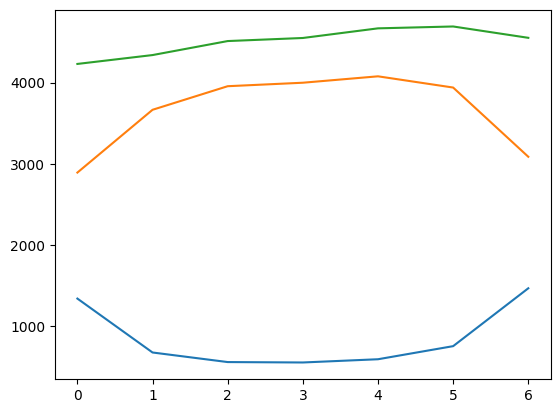

In [ ]:
plt.plot(day_grouping_df)

Grafik di atas menunjukkan bahwa:
1. rata-rata banyak pengguna kasual ketika akhir pekan lebih tinggi dibandingkan ketika hari kerja, dan
2. rata-rata banyak pengguna terdaftar ketika akhir pekan lebih rendah dibandingkan ketika hari kerja.

Hal ini mengindikasikan bahwa pengguna terdaftar menyewa sepeda dengan tujuan untuk urusan kerja (berangkat pulang) dan pengguna kasual menyewa dengan tujuan relatif santai, seperti berolahraga.

In [ ]:
day_df.groupby(by="workingday").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

,casual,registered,cnt
,mean,mean,mean
workingday,,,
0,1371.134199,2959.034632,4330.168831
1,606.570000,3978.250000,4584.820000


In [ ]:
day_df.groupby(by="holiday").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

,casual,registered,cnt
,mean,mean,mean
holiday,,,
0,841.771831,3685.332394,4527.104225
1,1064.714286,2670.285714,3735.000000


In [ ]:
day_df.groupby(by="season").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

,casual,registered,cnt
,mean,mean,mean
season,,,
1,334.928177,2269.204420,2604.132597
2,1106.097826,3886.233696,4992.331522
3,1202.611702,4441.691489,5644.303191
4,729.112360,3999.050562,4728.162921


In [ ]:
monthly_df = day_df.groupby(by="mnth").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})
monthly_df

,casual,registered,cnt
,mean,mean,mean
mnth,,,
1,194.225806,1982.112903,2176.338710
2,262.508772,2392.789474,2655.298246
3,716.838710,2975.419355,3692.258065
4,1013.366667,3471.533333,4484.900000
5,1214.274194,4135.500000,5349.774194
6,1231.766667,4540.600000,5772.366667
7,1260.596774,4303.080645,5563.677419
8,1161.919355,4502.500000,5664.419355


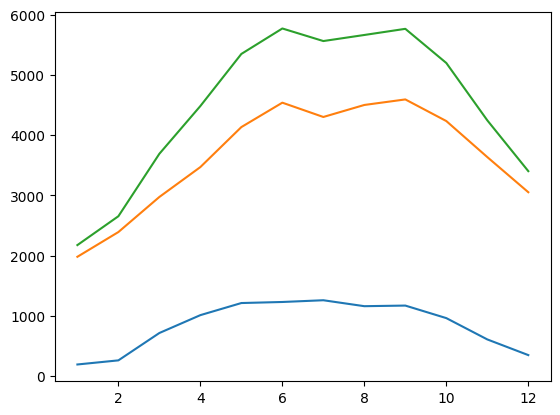

In [ ]:
plt.plot(monthly_df)

In [ ]:
hour_df.groupby(by="hr").agg({
    "casual": ["mean", "std"],
    "registered": ["mean", "std"],
    "cnt": ["mean", "std"]
})

casual             registered                     cnt            
         mean        std        mean         std        mean         std
hr                                                                      
0   10.158402  10.667953   43.739669   34.019585   53.898072   42.307910
1    6.504144   7.735334   26.871547   27.344153   33.375691   33.538727
2    4.772028   6.514780   18.097902   21.303895   22.869930   26.578642
3    2.715925   4.315795    9.011478    9.743691   11.727403   13.239190
4    1.253945   1.887669    5.098996    3.134479    6.352941    4.143818
5    1.411437   1.790581   18.478382   12.674751   19.889819   13.200765
6    4.161379   3.691509   71.882759   53.535307   76.044138   55.084348
7   11.055021   8.356205  201.009629  157.120459  212.064649  161.441936
8   21.679505  13.741229  337.331499  229.698404  359.011004  235.189285
9   30.891334  24.472856  188.418157   84.633490  219.309491   93.703458
10  46.477304  41.346206  127.191197   66.281668  173.668501  102.205413
11  59.540578  54.481788  148.602476   79.090301  208.143054  127.495536
12  68.293956  64.394237  185.021978   89.240873  253.315934  145.081134
13  72.308642  69.819228  181.352538   87.424775  253.661180  148.107657
14  75.567901  71.599225  165.381344   84.055205  240.949246  147.271574
15  74.905350  70.289359  176.327846   84.488219  251.233196  144.632541
16  73.745205  67.015206  238.238356  103.765726  311.983562  148.682618
17  74.273973  61.491021  387.178082  211.676303  461.452055  232.656611
18  61.120879  50.981553  364.390110  203.599896  425.510989  224.639304
19  48.770604  42.328913  262.752747  138.708622  311.523352  161.050359
20  36.233516  32.103347  189.796703  100.293791  226.030220  119.670164
21  28.255495  25.378252  144.059066   73.149848  172.314560   89.788893
22  22.252747  20.450211  109.082418   55.252765  131.335165   69.937782
23  15.199176  13.804596   72.631868   40.446431   87.831044   50.846889

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Untuk mengetahui trend total penggunaan sepeda dari bulan ke bulan, dibuat dataframe baru yang mengubah frekuensi dari harian ke bulanan dari dataframe day_df.

In [ ]:
month_df = day_df.resample(rule="ME", on="dteday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

# mengubah format index menjadi nama bulan
month_df.index = month_df.index.strftime('%B %Y')

month_df = month_df.reset_index()
month_df.rename(columns={
    "dteday": "month"
}, inplace=True)
month_df.head()

,month,casual,registered,cnt
0,January 2011,3073,35116,38189
1,February 2011,6242,41973,48215
2,March 2011,12826,51219,64045
3,April 2011,22346,72524,94870
4,May 2011,31050,104771,135821


Dari data tabel di atas, dibuat grafik sebagai berikut.

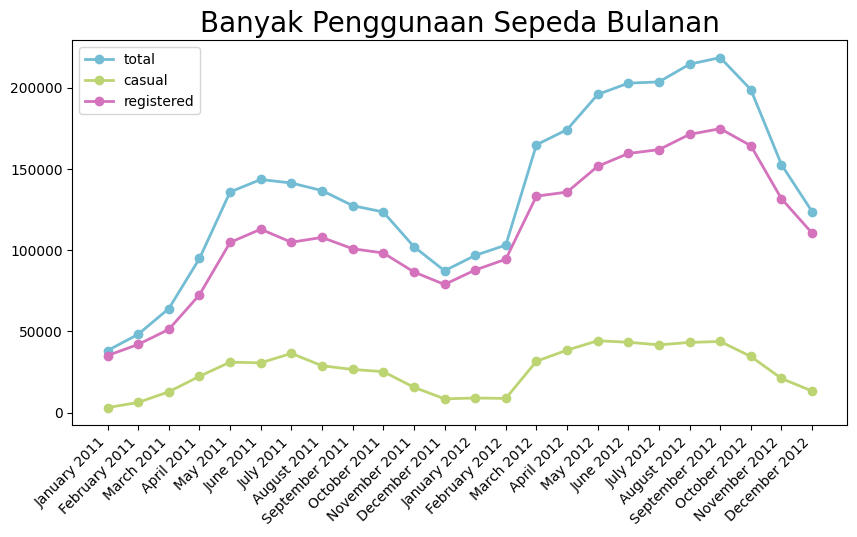

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(month_df["month"], month_df["cnt"], label="total", marker='o', linewidth=2, color='#72BCD4')
plt.plot(month_df["month"], month_df["casual"], label="casual", marker='o', linewidth=2, color='#BCD472')
plt.plot(month_df["month"], month_df["registered"], label="registered", marker='o', linewidth=2, color='#D472BC')

plt.title("Banyak Penggunaan Sepeda Bulanan", fontsize=20)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.legend()
plt.show()


**Insight:**
Dari grafik di atas, diperoleh insight sebagai berikut.
- Total pengguna sepeda keseluruhan naik dari Januari-Mei 2011 kemudian mulai melandai dan terjadi penurunan perlahan pada Mei-Oktober 2011. Setelah itu, terjadi penurunan tajam dari Oktober-Desember 2011.
- Berikutnya, pada periode Januari-Februari 2012 terjadi kenaikan yang diikuti lompatan pada bulan Maret 2012. Pada periode Maret-September 2012 terjadi kenaikan yang signifikan dengan diikuti penurunan tajam pada September-Desember 2012.
- Tren yang serupa terjadi pada total pengguna sepeda kasual dan terdaftar.
- Dapat dilihat juga bahwa total penggunaan sepeda pada April-September (kuartal kedua dan ketiga) lebih tinggi daripada pada bulan Oktober-Maret (kuartal pertama dan keempat).

### Pertanyaan 2:

Untuk mencari tahu hari dengan total penggunaan sepeda tertinggi, maka dibuat dataframe baru seperti berikut.

In [ ]:
daily_df = day_df.copy()

# membuat kolom hari
daily_df["day"] = daily_df["dteday"].dt.day_name()
daily_df = daily_df.groupby(by="day").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
daily_df = daily_df.reset_index()
daily_df

,day,casual,registered,cnt
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


Selanjutnya dari tabel tersebut, diperoleh grafik berikut.

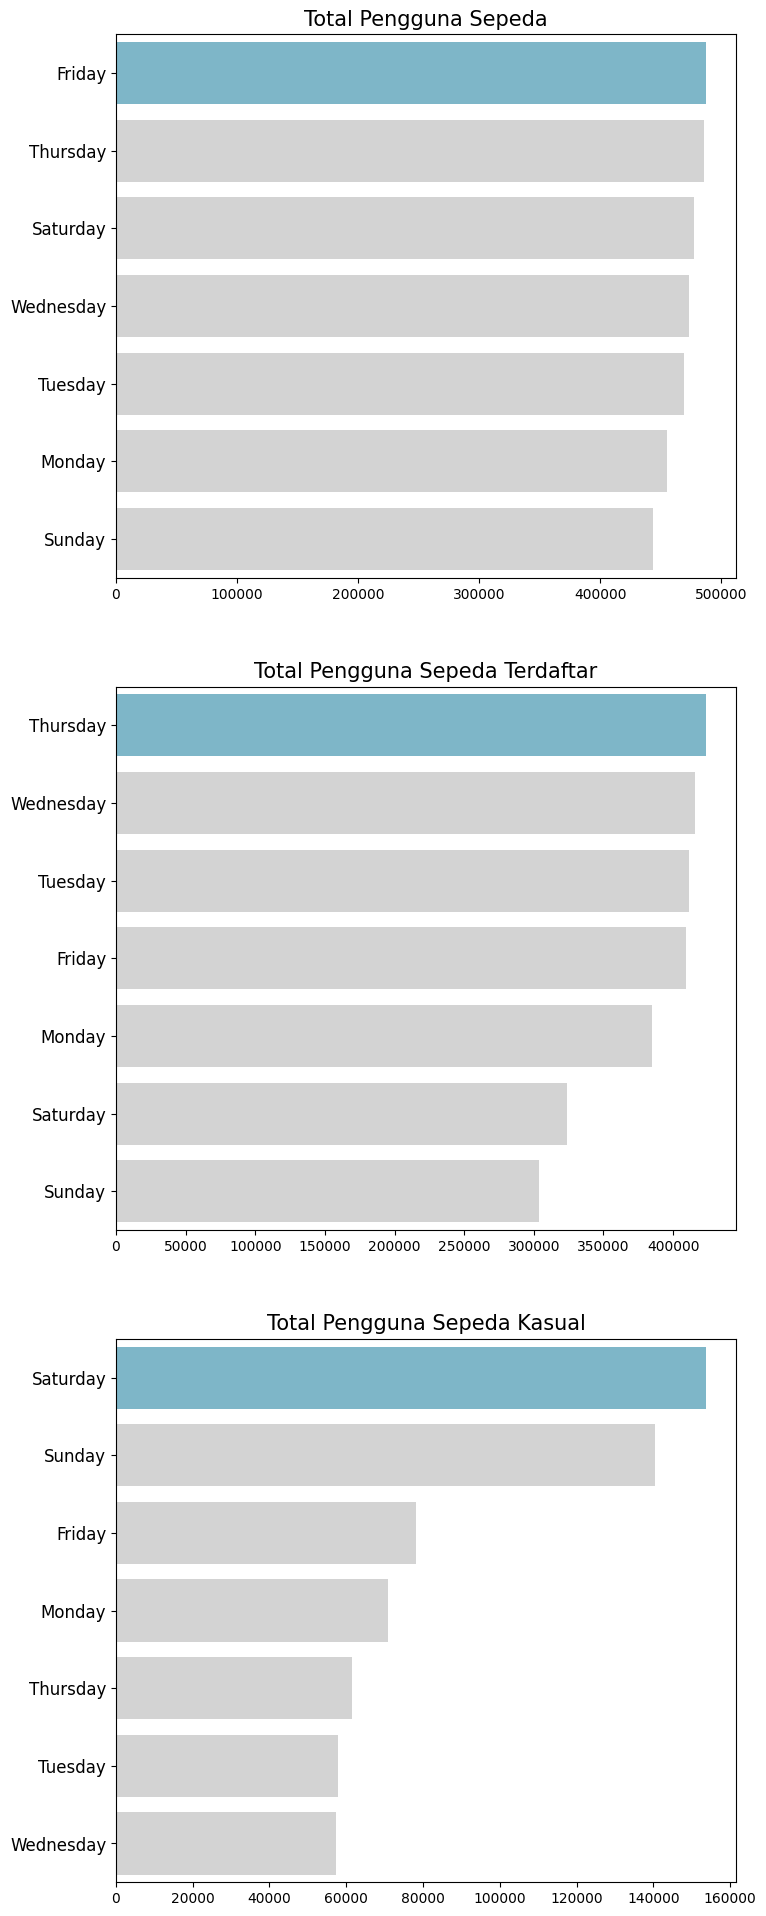

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 24))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="day", hue="day", x="cnt", data=daily_df.sort_values(by=["cnt"], ascending=False), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Total Pengguna Sepeda", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(y="day", hue="day",x="registered", data=daily_df.sort_values(by=["registered"], ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Total Pengguna Sepeda Terdaftar", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

sns.barplot(y="day", hue="day", x="casual", data=daily_df.sort_values(by=["casual"], ascending=False), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Total Pengguna Sepeda Kasual", loc="center", fontsize=15)
ax[2].tick_params(axis ='y', labelsize=12)



**Insight:**
Dari visualisasi di atas, diperoleh bahwa
- total pengguna sepeda keseluruhan mencapai maksimum pada hari Jumat dengan persebaran data yang cukup merata (variansi data rendah, perbedaan total pengguna sepeda keseluruhan antar hari tidak terlalu signifikan),
- total pengguna sepeda terdaftar mencapai maksimum pada hari kamis dengan total pengguna sepeda terdaftar lebih banyak pada hari kerja dibandingkan hari libur, dan
- total pengguna sepeda terdaftar mencapai maksimum pada hari sabtu dengan total pengguna sepeda kasual lebih banyak pada hari libur dibandingkan hari kerja.

## Analisis Lanjutan (Opsional)

Dari pertanyaan pertama sebelumnya, **diperoleh gambaran** dari penggunaan sepeda per kuartal. **Untuk memperjelas gambaran tersebut**, akan dibuat visualisasi data total penggunaan sepeda per kuartal dengan menggunakan **metode binning**. Sebelumnya, akan dibuat dataframe yang mengubah frekuensi dataframe day_df menjadi per kuartal.

In [ ]:
quarter_df = day_df.copy()

# membuat kolom kuartal
quarter_df["quarter"] = quarter_df["dteday"].dt.strftime('%Y-Q') + quarter_df['dteday'].dt.quarter.astype('string')
quarter_df = quarter_df.groupby(by="quarter").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
quarter_df = quarter_df.reset_index()
quarter_df

,quarter,casual,registered,cnt
0,2011-Q1,22141,128308,150449
1,2011-Q2,84008,290195,374203
2,2011-Q3,91839,313611,405450
3,2011-Q4,49264,263737,313001
4,2012-Q1,49308,315448,364756
5,2012-Q2,125985,446934,572919
6,2012-Q3,128680,508003,636683
7,2012-Q4,68792,406426,475218


Dari tabel di atas, dibuat visualisasi data berupa bar chart sebagai berikut.

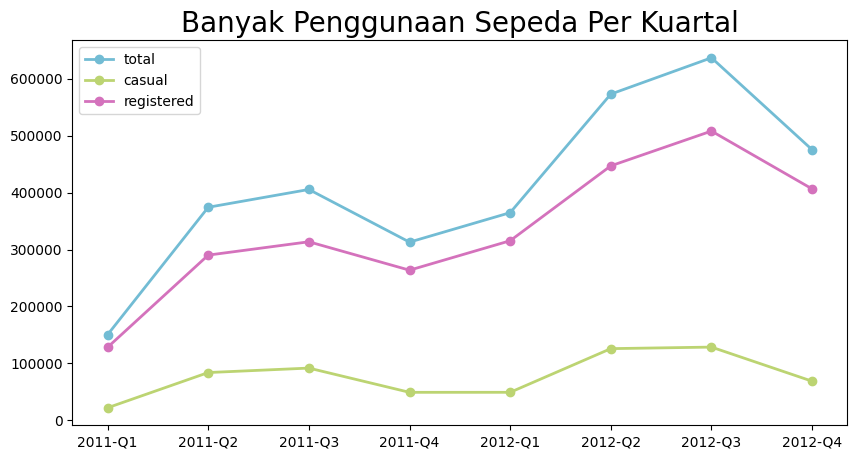

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(quarter_df["quarter"], quarter_df["cnt"], label="total", marker='o', linewidth=2, color='#72BCD4')
plt.plot(quarter_df["quarter"], quarter_df["casual"], label="casual", marker='o', linewidth=2, color='#BCD472')
plt.plot(quarter_df["quarter"], quarter_df["registered"], label="registered", marker='o', linewidth=2, color='#D472BC')

plt.title("Banyak Penggunaan Sepeda Per Kuartal", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

Dapat dilihat secara lebih jelas bahwa kuartal kedua dan ketiga memiliki total pengguna sepeda keseluruhan, kasual dan terdaftar yang lebih tinggi dibandingkan pada kuartal pertama dan keempat.

## Conclusion

- Total pengguna sepeda keseluruhan, terdaftar dan kasual mengalami **kenaikan** pada **awal tahun** yang kemudian mengalami **penurunan** pada **akhir tahun** sehingga banyak pengguna pada **kuartal kedua dan ketiga lebih tinggi** daripada **kuartal pertama dan keempat**.
- Total pengguna sepeda keseluruhan, terdaftar dan kasual, secara berturut-turut, paling banyak pada hari **jumat, kamis** dan **sabtu**.

In [ ]:
%%capture
# installing streamlit and localtunnel
!pip install streamlit
!npm install localtunnel

In [ ]:
%%writefile dashboard.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
sns.set(style='dark')

# create ridership by day dataframe
def create_day_dataframe(df):
  daily_df = df.copy()

  # membuat kolom hari
  daily_df["day"] = daily_df["dteday"].dt.day_name()
  daily_df = daily_df.groupby(by="day").agg({
      "casual": "sum",
      "registered": "sum",
      "cnt": "sum"
  })
  daily_df = daily_df.reset_index()
  return daily_df

# create monthly dataframe
def create_monthly_dataframe(df):
  month_df = df.resample(rule="ME", on="dteday").agg({
      "casual": "sum",
      "registered": "sum",
      "cnt": "sum"
  })

  # mengubah format index menjadi nama bulan
  month_df.index = month_df.index.strftime('%B %Y')

  month_df = month_df.reset_index()
  month_df.rename(columns={
      "dteday": "month"
  }, inplace=True)
  return month_df

# create quarterly dataframe
def create_quarterly_dataframe(df):
  quarter_df = df.copy()

  # membuat kolom kuartal
  quarter_df["quarter"] = quarter_df["dteday"].dt.strftime('%Y-Q') + quarter_df['dteday'].dt.quarter.astype('string')
  quarter_df = quarter_df.groupby(by="quarter").agg({
      "casual": "sum",
      "registered": "sum",
      "cnt": "sum"
  })
  quarter_df = quarter_df.reset_index()
  return quarter_df

# load all_df
all_df = pd.read_csv("main_data.csv")
all_df.sort_values(by="dteday", inplace=True)
all_df.reset_index(inplace=True)
all_df["dteday"] = pd.to_datetime(all_df["dteday"])

# create filter component
min_date = all_df["dteday"].min()
max_date = all_df["dteday"].max()

with st.sidebar:
  # adding start_date and end_date
  start_date, end_date = st.date_input(
      label="Rentang Waktu",
      min_value=min_date,
      max_value=max_date,
      value=[min_date, max_date]
  )

# filtering all_df
main_df = all_df[(all_df["dteday"] >= str(start_date)) &
                (all_df["dteday"] <= str(end_date))]

# create supporting df
daily_df = create_day_dataframe(main_df)
month_df = create_monthly_dataframe(main_df)
quarter_df = create_quarterly_dataframe(main_df)

# adding header
st.header("Bike Ridership Dashboard :sparkles:")

# daily ridership metric
st.subheader("Daily Bike Ridership")
col1, col2, col3 = st.columns(3)

with col1:
  total_cnt = main_df.cnt.sum()
  st.metric("Total Riders", value=total_cnt)

with col2:
  total_reg = main_df.registered.sum()
  st.metric("Total Registered Riders", value=total_reg)

with col3:
  total_cas = main_df.casual.sum()
  st.metric("Total Casual Riders", value=total_cas)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    main_df["dteday"],
    main_df["cnt"],
    marker="o",
    linewidth=2,
    color="#90CAF9",
    label="total"
)
ax.plot(
    main_df["dteday"],
    main_df["registered"],
    marker="o",
    linewidth=2,
    color="#BCD472",
    label="registered"
)
ax.plot(
    main_df["dteday"],
    main_df["casual"],
    marker="o",
    linewidth=2,
    color="#F990CA",
    label="casual"
)
ax.legend()
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=15)
st.pyplot(fig)

# monthly ridership metric
st.subheader("Monthly Bike Ridership")
col1, col2, col3 = st.columns(3)

with col1:
  total_cnt = month_df.cnt.sum()
  st.metric("Total Riders", value=total_cnt)

with col2:
  total_reg = month_df.registered.sum()
  st.metric("Total Registered Riders", value=total_reg)

with col3:
  total_cas = month_df.casual.sum()
  st.metric("Total Casual Riders", value=total_cas)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    month_df["month"],
    month_df["cnt"],
    marker="o",
    linewidth=2,
    color="#90CAF9",
    label="total"
)
ax.plot(
    month_df["month"],
    month_df["registered"],
    marker="o",
    linewidth=2,
    color="#BCD472",
    label="registered"
)
ax.plot(
    month_df["month"],
    month_df["casual"],
    marker="o",
    linewidth=2,
    color="#F990CA",
    label="casual"
)
ax.legend()
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=15, rotation=45)
xticks = ax.get_xticks()
xlabels = ax.get_xticklabels()
ax.set_xticks(xticks[::len(xticks) // 8], xlabels[::len(xlabels) // 8], ha="right")
st.pyplot(fig)

# quarterly ridership metric
st.subheader("Quarterly Bike Ridership")
col1, col2, col3 = st.columns(3)

with col1:
  total_cnt = quarter_df.cnt.sum()
  st.metric("Total Riders", value=total_cnt)

with col2:
  total_reg = quarter_df.registered.sum()
  st.metric("Total Registered Riders", value=total_reg)

with col3:
  total_cas = quarter_df.casual.sum()
  st.metric("Total Casual Riders", value=total_cas)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    quarter_df["quarter"],
    quarter_df["cnt"],
    marker="o",
    linewidth=2,
    color="#90CAF9",
    label="total"
)
ax.plot(
    quarter_df["quarter"],
    quarter_df["registered"],
    marker="o",
    linewidth=2,
    color="#BCD472",
    label="registered"
)
ax.plot(
    quarter_df["quarter"],
    quarter_df["casual"],
    marker="o",
    linewidth=2,
    color="#F990CA",
    label="casual"
)
ax.legend()
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=15)
st.pyplot(fig)

# ridership by day metric
st.subheader("Day with Highest Ridership")
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(figsize=(30, 20))
sns.barplot(y="day", hue="day", x="cnt", data=daily_df.sort_values(by=["cnt"], ascending=False), palette=colors)
ax.set_ylabel(None)
ax.set_xlabel("Total Bike Riders", fontsize=30)
ax.set_title("Total Bike Ridership By Day", loc="center", fontsize=50)
ax.tick_params(axis ='y', labelsize=35)
ax.tick_params(axis ='x', labelsize=30)
ax.locator_params(axis="x", nbins=4)
st.pyplot(fig)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(60, 20))
sns.barplot(y="day", hue="day",x="registered", data=daily_df.sort_values(by=["registered"], ascending=False), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Registered Bike Riders", fontsize=30)
ax[0].set_title("Registered Bike Ridership By Day", loc="center", fontsize=50)
ax[0].tick_params(axis ='y', labelsize=35)
ax[0].tick_params(axis ='x', labelsize=30)
ax[0].locator_params(axis="x", nbins=4)

sns.barplot(y="day", hue="day", x="casual", data=daily_df.sort_values(by=["casual"], ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Casual Bike Riders", fontsize=30)
ax[1].set_title("Casual Bike Ridership By Day", loc="center", fontsize=50)
ax[1].tick_params(axis ='y', labelsize=35)
ax[1].tick_params(axis ='x', labelsize=30)
ax[1].locator_params(axis="x", nbins=4)

st.pyplot(fig)
st.caption("Dashboard")

Overwriting dashboard.py


In [ ]:
!streamlit run dashboard.py & npx localtunnel --port 8501

⠙

⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.37.204:8501

your url is: https://eighty-pillows-sin.loca.lt
  Stopping...
^C
